In [ ]:
import sys
!{sys.executable} -m pip install scipy matplotlib numpy

In [2]:
from scipy import fftpack
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
with open("xvalues.json") as f:
    xvalues = json.load(f)

with open("yvalues.json") as f:
    yvalues = json.load(f)

with open("zvalues.json") as f:
    zvalues = json.load(f)

67.160671820336
(1376,) (1376,)
[-658.24554443   39.58887403   39.14766547 ...    3.40014059   39.14766547
   39.58887403]


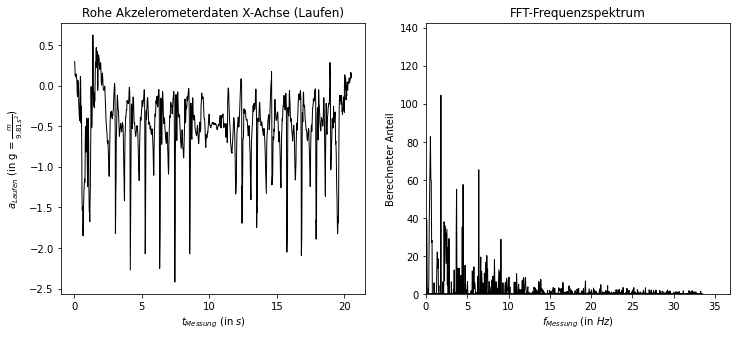

In [4]:
linewidth = 1

TX = np.array([(e["t"], e["v"]) for e in xvalues])

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(12, 5)

axs[0].plot([e[0] for e in TX], [e[1] for e in TX], label='x', linewidth=linewidth, color="black")
axs[0].set_title("Rohe Akzelerometerdaten X-Achse (Laufen)")
axs[0].set(xlabel=r'$t_{Messung}$ (in $s$)', ylabel=r'$a_{Laufen}$ (in g = $\frac{m}{9.81 s^2}$)')

sampling_rate = len(TX) / (TX[-1][0] - TX[0][0])
print(sampling_rate)
t = np.arange(len(TX))
sp = np.fft.fft(np.array([e[1] for e in TX]))
freq = np.fft.fftfreq(t.shape[-1], d=1/sampling_rate)

print(freq.shape, sp.real.shape)

print(sp.real)

axs[1].plot(freq, sp.real, label='x', linewidth=linewidth, color="black")
axs[1].set_title("FFT-Frequenzspektrum")
axs[1].set(xlabel=r'$f_{Messung}$ (in $Hz$)', ylabel=r'Berechneter Anteil')
plt.ylim(bottom=0)
plt.xlim(left=0)

plt.savefig('fft.pdf', dpi=1200, bbox_inches='tight')